Dataset: [Bitcoin Stock Data](https://www.kaggle.com/datasets/deepakvedantam/bitcoin-stock-data) <br>
Jumlah Baris: 2401 Baris <br>
Jumlah Kolom: 7 Kolom

In [1]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data_btc = pd.read_csv('/content/drive/MyDrive/datasets/BTC-USD (1).csv')
data_btc.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [4]:
data_btc.shape

(2401, 7)

In [5]:
data_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2401 non-null   object 
 1   Open       2397 non-null   float64
 2   High       2397 non-null   float64
 3   Low        2397 non-null   float64
 4   Close      2397 non-null   float64
 5   Adj Close  2397 non-null   float64
 6   Volume     2397 non-null   float64
dtypes: float64(6), object(1)
memory usage: 131.4+ KB


In [6]:
data_btc.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2397.000000,2397.000000,2397.000000,2397.000000,2397.000000,2.397000e+03
mean,6710.252012,6899.986370,6519.207884,6735.015073,6735.015073,1.153998e+10
std,9919.821658,10244.226682,9600.082607,9981.798132,9981.798132,1.834621e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,454.855011,458.765991,448.928009,454.984985,454.984985,6.748110e+07
50%,4090.479980,4208.390137,4006.192871,4100.520020,4100.520020,3.766810e+09
75%,8912.832031,9167.695313,8757.253906,8912.654297,8912.654297,1.756432e+10
max,61221.132813,63152.812500,59892.859375,62944.847656,62944.847656,3.509679e+11


In [7]:
data_btc.isnull().sum()

Date         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64

In [8]:
data_btc = data_btc.dropna().reset_index(drop=True)
data_btc.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
data_btc['Date'] = pd.to_datetime(data_btc['Date'])

In [10]:
data_btc = data_btc.drop(['High','Low','Close','Adj Close','Volume'], axis=1)

Text(0.5, 1.0, 'BTC Open')

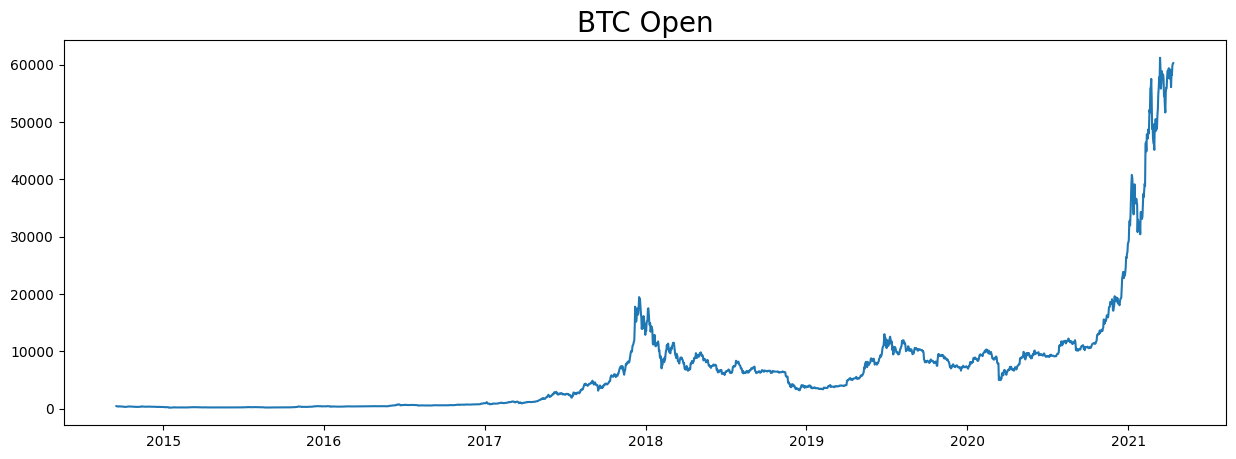

In [11]:
plt.figure(figsize=(15, 5))
plt.plot(data_btc['Date'], data_btc['Open'])
plt.title('BTC Open', fontsize=20)

In [12]:
data_btc

,Date,Open
0,2014-09-17,465.864014
1,2014-09-18,456.859985
2,2014-09-19,424.102997
3,2014-09-20,394.673004
4,2014-09-21,408.084991
...,...,...
2392,2021-04-09,58326.562500
2393,2021-04-10,58253.777344
2394,2021-04-11,59846.230469
2395,2021-04-12,60175.945313


In [13]:
from sklearn.preprocessing import MinMaxScaler
data_btc_scaled = data_btc.copy()

scaler = MinMaxScaler()
scaler.fit(data_btc_scaled[['Open']])
data_btc_scaled[['Open']] = scaler.transform(data_btc_scaled[['Open']])
data_btc_scaled

,Date,Open
0,2014-09-17,0.004734
1,2014-09-18,0.004586
2,2014-09-19,0.004050
3,2014-09-20,0.003568
4,2014-09-21,0.003787
...,...,...
2392,2021-04-09,0.952582
2393,2021-04-10,0.951390
2394,2021-04-11,0.977477
2395,2021-04-12,0.982878


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_btc['Date'], data_btc_scaled['Open'], test_size=0.2, shuffle=False)

In [15]:
print(len(x_train), len(x_test), len(y_train), len(y_test))

1917 480 1917 480


In [16]:
x_test

1917   2019-12-17
1918   2019-12-18
1919   2019-12-19
1920   2019-12-20
1921   2019-12-21
          ...    
2392   2021-04-09
2393   2021-04-10
2394   2021-04-11
2395   2021-04-12
2396   2021-04-13
Name: Date, Length: 480, dtype: datetime64[ns]

In [17]:
y_test

1917    0.110648
1918    0.106002
1919    0.116320
1920    0.115191
1921    0.115387
          ...   
2392    0.952582
2393    0.951390
2394    0.977477
2395    0.982878
2396    0.984794
Name: Open, Length: 480, dtype: float64

In [18]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [19]:
y_train_set = windowed_dataset(y_train, window_size=3, batch_size=100, shuffle_buffer=1000)
y_test_set = windowed_dataset(y_test, window_size=3, batch_size=100, shuffle_buffer=1000)

In [20]:
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(32, return_sequences=True),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.LSTM(16, return_sequences=True),
  tf.keras.layers.Dense(8, activation="relu"),
  tf.keras.layers.Dense(1),
])

In [21]:
class CallbackMAE(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    threshold_mae = (data_btc_scaled['Open'].max() - data_btc_scaled['Open'].min()) * 10/100

    if(logs.get('mae')<threshold_mae and logs.get('val_mae')<threshold_mae):
      print(f"\nMAE dan Val_MAE Sudah dibawah {threshold_mae}")
      self.model.stop_training = True
callbacks = CallbackMAE()

In [22]:
threshold_mae = (data_btc_scaled['Open'].max() - data_btc_scaled['Open'].min()) * 10/100
threshold_mae

0.1

In [23]:
# optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-02, momentum=0.9)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.03)
model.compile(
  loss=tf.keras.losses.Huber(),
  optimizer=optimizer,
  metrics=["mae"]
)
history = model.fit(
    y_train_set,
    epochs=100,
    batch_size=16,
    validation_data=y_test_set,
    callbacks=[callbacks],
    verbose=2,
  )

Epoch 1/100
20/20 - 18s - loss: 0.0021 - mae: 0.0505 - val_loss: 0.0623 - val_mae: 0.2392 - 18s/epoch - 911ms/step
Epoch 2/100
20/20 - 1s - loss: 0.0023 - mae: 0.0550 - val_loss: 0.0584 - val_mae: 0.2237 - 706ms/epoch - 35ms/step
Epoch 3/100
20/20 - 1s - loss: 0.0019 - mae: 0.0474 - val_loss: 0.0171 - val_mae: 0.1113 - 717ms/epoch - 36ms/step
Epoch 4/100
20/20 - 0s - loss: 5.7961e-04 - mae: 0.0248 - val_loss: 0.0267 - val_mae: 0.1183 - 333ms/epoch - 17ms/step
Epoch 5/100
20/20 - 0s - loss: 1.7115e-04 - mae: 0.0133 - val_loss: 0.0277 - val_mae: 0.1204 - 342ms/epoch - 17ms/step
Epoch 6/100
20/20 - 0s - loss: 1.1615e-04 - mae: 0.0102 - val_loss: 0.0262 - val_mae: 0.1136 - 317ms/epoch - 16ms/step
Epoch 7/100
20/20 - 0s - loss: 8.0034e-05 - mae: 0.0083 - val_loss: 0.0219 - val_mae: 0.1022 - 295ms/epoch - 15ms/step
Epoch 8/100

MAE dan Val_MAE Sudah dibawah 0.1
20/20 - 0s - loss: 6.8912e-05 - mae: 0.0077 - val_loss: 0.0210 - val_mae: 0.0990 - 345ms/epoch - 17ms/step


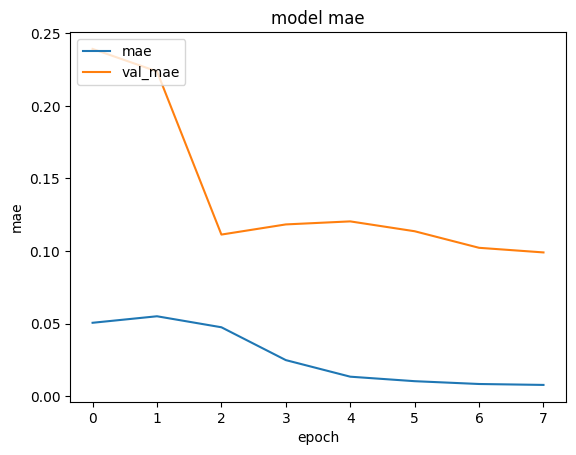

In [25]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['mae', 'val_mae'], loc='upper left')
plt.show()